

---


### Import TensorFlow and helper libraries


---



In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
# Helper libraries
import cv2 as cv2
import matplotlib.pyplot as plt
import numpy as np

print(tf.__version__)

Using TensorFlow backend.


2.2.0




---


### Acquire DataSet
Download CIFAR100 dataset - copy them into train images/labels, test images/labels


---



In [ ]:
number_cifar100 = keras.datasets.cifar100
(train_images, train_labels), (test_images, test_labels) = number_cifar100.load_data(label_mode='fine')

169009152/169001437 [==============================] - 11s 0us/step




---


### Preprocessing


---



In [ ]:
#Scaling images for training/testing as required by network - pixel range 0-1
train_images, test_images = train_images / 255.0, test_images / 255.0



---


### Extracting required classes from CIFAR-100 dataset

For training and testing we want to use only 3 classes:
* `0` - apple
* `53` - orange
* `57` - pear

Therefore, we need to extract these classes from whole CIFAR-100 dataset


---



In [ ]:
#APPLE, class 0
idx_train_apple = (train_labels == 0) #returns array (shape is the same as train_labels, i.e. (50000, 1)) with true when train_labels equals to 0, otherwise false (for whole train_labels array)
idx_test_apple = (test_labels == 0)

#reshaping array (50000, 1) to (50000, ), i.e. to 1D array: 1 row and 50000 columns
#train_images.shape[0] returns first atribute from shape of train_images, i.e. 50000
idx_train_apple = idx_train_apple.reshape(train_images.shape[0])
idx_test_apple = idx_test_apple.reshape(test_images.shape[0])

train_images_apple = train_images[idx_train_apple] #extracting images corresponding with class 0 (apple), returns array with shape (500, 32, 32, 3)
train_labels_apple = train_labels[idx_train_apple] #extracting labels which are class 0 (apple), returns array with shape (500, 1)
test_images_apple = test_images[idx_test_apple]
test_labels_apple = test_labels[idx_test_apple]

#ORANGE, class 53
idx_train_orange = (train_labels == 53) #returns array (shape is the same as train_labels, i.e. (50000, 1)) with true when train_labels equals to 53, otherwise false (for whole train_labels array)
idx_test_orange = (test_labels == 53) #returns array (shape is the same as train_labels, i.e. (50000, 1)) with true when train_labels equals to 53, otherwise false (for whole train_labels array)

#reshaping array (50000, 1) to (50000, ), i.e. to 1D array: 1 row and 50000 columns
#train_images.shape[0] returns first atribute from shape of train_images, i.e. 50000
idx_train_orange = idx_train_orange.reshape(train_images.shape[0])
idx_test_orange = idx_test_orange.reshape(test_images.shape[0])

train_images_orange = train_images[idx_train_orange] #extracting images corresponding with class 53 (orange), returns array with shape (500, 32, 32, 3)
train_labels_orange = train_labels[idx_train_orange] #extracting labels which are class 53 (orange), returns array with shape (500, 1)
test_images_orange = test_images[idx_test_orange]
test_labels_orange = test_labels[idx_test_orange]

#PEAR, class 57
idx_train_pear = (train_labels == 57) #returns array (shape is the same as train_labels, i.e. (50000, 1)) with true when train_labels equals to 57, otherwise false (for whole train_labels array)
idx_test_pear = (test_labels == 57)

#reshaping array (50000, 1) to (50000, ), i.e. to 1D array: 1 row and 50000 columns
#train_images.shape[0] returns first atribute from shape of train_images, i.e. 50000
idx_train_pear = idx_train_pear.reshape(train_images.shape[0])
idx_test_pear = idx_test_pear.reshape(test_images.shape[0])

train_images_pear = train_images[idx_train_pear] #extracting images corresponding with class 57 (pear), returns array with shape (500, 32, 32, 3)
train_labels_pear = train_labels[idx_train_pear] #extracting labels which are class 57 (pear), returns array with shape (500, 1)
test_images_pear = test_images[idx_test_pear]
test_labels_pear = test_labels[idx_test_pear]



---


### Concatenating arrays
Creating one array with only required classes:
* `0` - apple
* `53` - orange
* `57` - pear

Finally we get:
* 1500 images of training dataset (500 training images per class)
* 300 images of testing dataset (100 testing images per class)


---



In [ ]:
#Filtered TRAINING dataset
train_images_filtered = np.concatenate((train_images_apple, train_images_orange, train_images_pear)) #shape is (1500, 32, 32 ,3)
train_labels_filtered = np.concatenate((train_labels_apple, train_labels_orange, train_labels_pear)) #shape is (1500, 1)

#Filtered TESTING dataset
test_images_filtered = np.concatenate((test_images_apple, test_images_orange, test_images_pear)) #shape is (300, 32, 32 ,3)
test_labels_filtered = np.concatenate((test_labels_apple, test_labels_orange, test_labels_pear)) #shape is (300, 1)



---


### Modification of arrays with labels
So far, concatenated arrays with labels contain classes: `0`, `53`, `57`.

Let's change classes following below rule:
* `0` -> `0` no modification required (apple)
* `53` -> `1` (orange)
* `57` -> `2` (pear)


---



In [ ]:
train_labels_filtered[train_labels_filtered == 53] = 1
test_labels_filtered[test_labels_filtered == 53] = 1

train_labels_filtered[train_labels_filtered == 57] = 2
test_labels_filtered[test_labels_filtered == 57] = 2

num_category = 3
class_names_filtered = ['apple', 'orange', 'pear']



---


### Crop images to 28x28


---



In [ ]:
train_images_cropped = train_images_filtered[:, 2:30, 2:30, :]
print(train_images_cropped.shape)

test_images_cropped = test_images_filtered[:, 2:30, 2:30, :]
print(test_images_cropped.shape)

(1500, 28, 28, 3)
(300, 28, 28, 3)




---


### Verify the data
To verify that the dataset looks correct, let's plot the first 100 images from the **filtered training** or **filtered testing** set and display the class name below each image.

* For **filtered training** use `dataset_to_check = "training"`
* For **filtered testing** use `dataset_to_check = "testing"`





---



dataset_to_check = training


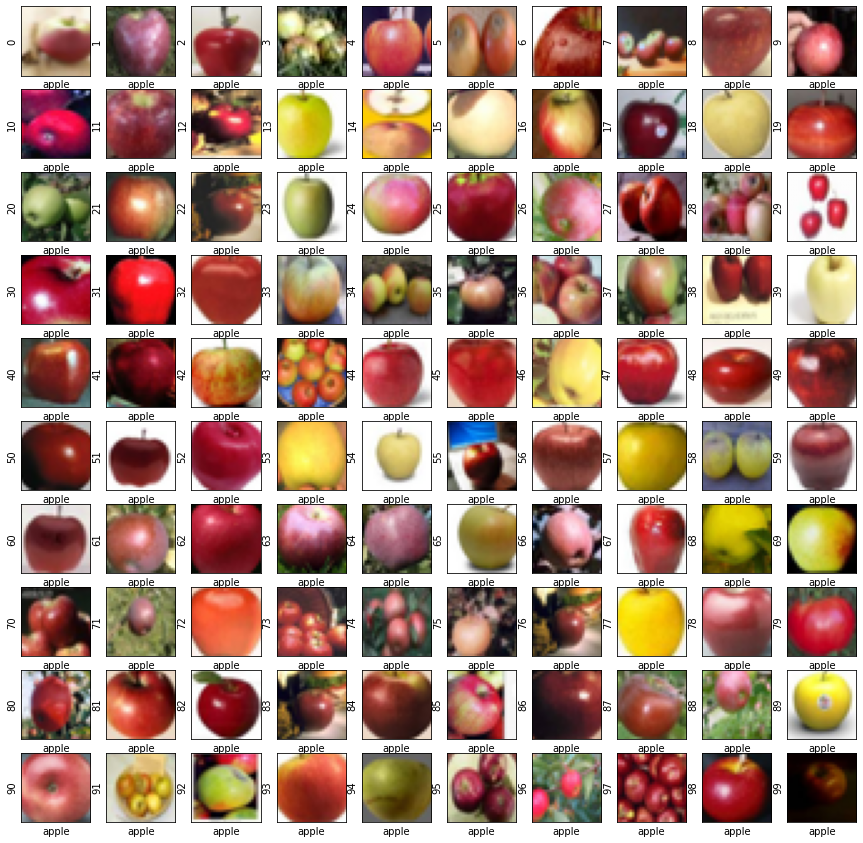

In [ ]:
dataset_to_check = "training"

print("dataset_to_check =", dataset_to_check)

if dataset_to_check == "training":
  plt.figure(figsize=(15,15))
  for i in range(100): #for next batch use range(100,200)
      plt.subplot(10,10,i+1) #for next batch use (10,10,i+1-100)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      #visualize train images
      plt.imshow(train_images_cropped[i], cmap=plt.cm.binary)
      # The CIFAR labels happen to be arrays,
      # which is why you need the extra index
      #train labels
      plt.xlabel(class_names_filtered[train_labels_filtered[i][0]])
      plt.ylabel(i)
  plt.show()
elif dataset_to_check == "testing":
  plt.figure(figsize=(15,15))
  for i in range(100): #for next batch use range(100,200)
      plt.subplot(10,10,i+1) #for next batch use (10,10,i+1-100)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      #visualize test images
      plt.imshow(test_images_cropped[i], cmap=plt.cm.binary)
      # The CIFAR labels happen to be arrays,
      # which is why you need the extra index
      #test labels
      plt.xlabel(class_names_filtered[test_labels_filtered[i][0]])
      plt.ylabel(i)
  plt.show()
else:
  print("try again!")



---


### Build the model


---



In [ ]:
model = Sequential()
model.add(Conv2D(2, (3, 3), input_shape=(28, 28, 3), activation = 'relu', name = 'conv2d0'))
model.add(MaxPooling2D(pool_size=(2, 2),name='maxpool'))
model.add(Conv2D(4, (3, 3), input_shape=(13, 13, 2), activation = 'relu', name = 'conv2d1'))
model.add(Conv2D(4, (3, 3), input_shape=(11, 11, 4), activation = 'relu', name = 'conv2d2'))
model.add(Conv2D(2, (3, 3), input_shape=(9, 9, 4), activation = 'relu', name = 'conv2d3'))
model.add(Flatten(name='flatten'))
model.add(Dense(num_category, activation='softmax',name='softmax'))



---


### Compile and Train the Model, Evaluate Accuracy


---



In [ ]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

model.fit(train_images_cropped, train_labels_filtered, epochs=5)

test_loss, test_acc = model.evaluate(test_images_cropped, test_labels_filtered)
print('Test accuracy:', test_acc)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d0 (Conv2D)             (None, 26, 26, 2)         56        
_________________________________________________________________
maxpool (MaxPooling2D)       (None, 13, 13, 2)         0         
_________________________________________________________________
conv2d1 (Conv2D)             (None, 11, 11, 4)         76        
_________________________________________________________________
conv2d2 (Conv2D)             (None, 9, 9, 4)           148       
_________________________________________________________________
conv2d3 (Conv2D)             (None, 7, 7, 2)           74        
_________________________________________________________________
flatten (Flatten)            (None, 98)                0         
_________________________________________________________________
softmax (Dense)              (None, 3)                



---


### Write layer information in text file


---



In [ ]:
l_count = 1
file2write=open("model_desc_FE.txt",'w')
for l in model.layers:
    file2write.write("++++++++++++++++++++++++++++++++++++++++++++++++++++++\n")
    file2write.write("LAYER #{}\n" .format(l_count))    
    file2write.write("Configuration: {}\n" .format(l.get_config()))
    file2write.write("Weights: {}\n".format(l.get_weights()))   
    l_count = l_count + 1

file2write.close()



---


### Save the model


---



In [ ]:
#Save model as JSON
######################################################################
# serialize model to JSON
model_json = model.to_json()
with open("model_4layer1_FE.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("model_4layer1_weights_FE.h5")
print("Saved model to disk (json)")

# Save model as h5
######################################################################
model.save('model_4layer_full_FE.h5')
print('Saved model to disk (h5)')

Saved model to disk (json)
Saved model to disk (h5)
